In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from os import path
import gtfparse
import pyensembl
pyensembl.EnsemblRelease(release=87)
import gspread
from  oauth2client.service_account  import ServiceAccountCredentials
import gspread
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

In [2]:
f = '/bigstore/GeneralStorage/Zach/MERFISH/cell_cycle_Tirosh2015.xlsx'
cell_cycle_df = pd.read_excel(f)
cell_cycle_df.index = cell_cycle_df['Symbol']
keep_cols = ['Early G1','Late G1','S','G2/M']
cell_cycle_z = (cell_cycle_df[keep_cols]-np.mean(cell_cycle_df[keep_cols],axis=0))/np.std(cell_cycle_df[keep_cols],axis=0)
for column in cell_cycle_z.columns:
    col_name = 'Z_'+column
    cell_cycle_df[col_name] = cell_cycle_z[column]
cell_cycle_df

,Symbol,UCSC transcripts,Significant populations,Early G1,Late G1,S,G2/M,Z_Early G1,Z_Late G1,Z_S,Z_G2/M
Symbol,,,,,,,,,,,
NaN,NaN,"'uc008stp.1,uc008stq.1,uc012ddr.1'",4,1.174568,0.387289,0.958305,0.797759,0.329581,-0.811572,-0.636661,-0.631791
Lsm10,Lsm10,"'uc008usk.2,uc012dlb.1'",2,0.910408,0.847573,0.099923,0.381764,0.037644,-0.429975,-1.197234,-0.946116
Itga2b,Itga2b,"'uc007lrx.2,uc007lry.2,uc007lrz.1,uc007lsa.1'",3,0.990586,0.791526,0.119766,0.286993,0.126253,-0.476441,-1.184276,-1.017726
Mavs,Mavs,"'uc008mld.1,uc008mle.1,uc008mlf.1'",4,1.656557,0.708190,1.001107,0.657129,0.862251,-0.545530,-0.608709,-0.738050
Cnot2,Cnot2,"'uc007hca.2,uc007hcb.2,uc007hcc.2,uc007hcd.2,u...",2,1.146358,0.791173,-0.072740,1.028570,0.298405,-0.476734,-1.309993,-0.457389
Pttg1ip,Pttg1ip,'uc007fvx.1',2,1.310732,0.194311,0.191707,1.004011,0.480062,-0.971560,-1.137294,-0.475946
Pgrmc1,Pgrmc1,'uc009sxo.1',2,1.673315,0.847345,1.340664,0.983302,0.880771,-0.430164,-0.386958,-0.491594
Rabepk,Rabepk,"'uc008jiu.1,uc008jiv.1'",3,1.514819,1.169226,1.065608,1.221047,0.705609,-0.163310,-0.566586,-0.311953
Morf4l1,Morf4l1,"'uc009qzw.2,uc009qzx.2,uc009qzy.1,uc009qzz.2'",2,1.116734,0.850218,0.963289,0.157232,0.265665,-0.427782,-0.633406,-1.115773


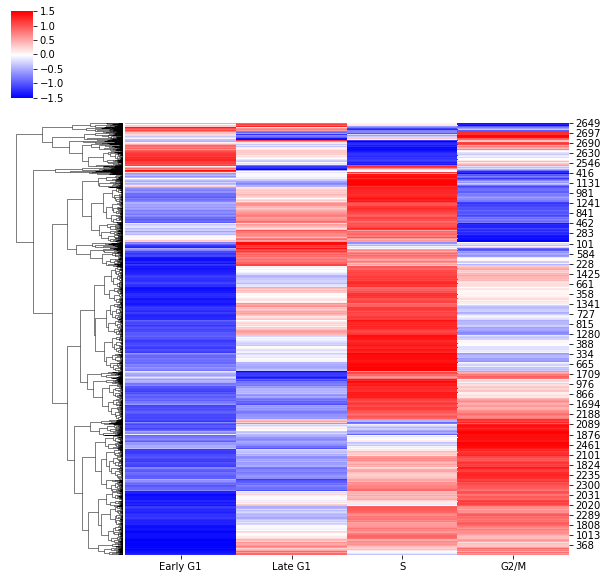

In [70]:
keep_col = ['Early G1','Late G1','S','G2/M']
sns.clustermap(cell_cycle_df[keep_col],center=0,cmap='bwr',col_cluster=False,z_score=0)

In [71]:
cell_cycle_z = (cell_cycle_df[keep_col]-np.mean(cell_cycle_df[keep_col],axis=0))/np.std(cell_cycle_df[keep_col],axis=0)

In [165]:
scope = ['https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive']
# Path to .json
path = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/ProbeDesign-92ebdb6a17a7.json'
creds = ServiceAccountCredentials.from_json_keyfile_name(path, scope)
client = gspread.authorize(creds)
# Start with a gene list 
expression_worksheet = client.open("Cell_Cycle_Gene_List").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
expression_df

INFO:oauth2client.client:Refreshing access_token


,Barcode,Description,Early_G1,FPKM,G2/M,Gene,Gene_ID,Late_G1,Length,Oligos,S,Transcript_ID,Z_Early_G1,Z_G2/M,Z_Late_G1,Z_S
0,1000110010000000,RIKEN cDNA A430005L14 gene [Source:MGI Symbol;...,1.419,,2.269,A430005L14Rik,ENSMUSG00000047613,1.367,,,1.784,,0.600,0.480,0.001,-0.097
1,1000110010000000,RIKEN cDNA A530040E14 gene [Source:MGI Symbol;...,-0.701,,-1.031,A530040E14Rik,ENSMUSG00000072109,-0.650,,,-1.012,,-1.743,-2.013,-1.672,-1.924
2,1000110010000000,RIKEN cDNA gene A530072M11 [Source:MGI Symbol;...,-0.586,,-0.881,A530072M11Rik,ENSMUSG00000085112,-0.837,,,-1.267,,-1.616,-1.900,-1.826,-2.090
3,1000110010000000,RIKEN cDNA A730017L22 gene [Source:MGI Symbol;...,-0.538,,-0.816,A730017L22Rik,ENSMUSG00000085566,-0.857,,,-1.219,,-1.563,-1.851,-1.843,-2.058
4,1000110010000000,,-0.626,,-0.040,A930001N09Rik,,-1.768,,,-1.248,,-1.660,-1.265,-2.599,-2.078
5,1000110010000000,,-0.510,,-0.854,AC125373.1,,-0.816,,,-1.193,,-1.532,-1.880,-1.809,-2.042
6,1000110010000000,,0.744,,1.538,AI314976,,0.870,,,1.324,,-0.146,-0.073,-0.411,-0.398
7,1000110010000000,expressed sequence AI413582 [Source:MGI Symbol...,0.563,,0.252,AI413582,ENSMUSG00000062753,1.131,,,2.134,,-0.346,-1.044,-0.195,0.131
8,1000110010000000,,0.516,,1.180,AI597468,,0.648,,,1.359,,-0.398,-0.343,-0.595,-0.375
9,1000110010000000,"achalasia, adrenocortical insufficiency, alacr...",2.320,,4.186,Aaas,ENSMUSG00000036678,3.549,,,4.355,,1.596,1.928,1.810,1.581


In [100]:
biomart_download_fname = '/bigstore/binfo/mouse/mouse_ensemble.txt'
expression_path = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/MERFISH_analysis-master/mouse/Zach/Cornea/Expression/no_versions_isoforms_tracking.csv'
FPKM_df = pd.read_csv(open(expression_path, 'r'))
transcript_df = pd.read_csv(open(biomart_download_fname, 'r'))

gids = expression_worksheet.range('F2:F3000')
tids = expression_worksheet.range('G2:G3000')
fpkm = expression_worksheet.range('C2:C3000')
length = expression_worksheet.range('D2:D3000')
descript = expression_worksheet.range('B2:B3000')
gene_name = expression_worksheet.range('A2:A3000')
EG1 = expression_worksheet.range('I2:I3000')
LG1 = expression_worksheet.range('J2:J3000')
S = expression_worksheet.range('K2:K3000')
G2 = expression_worksheet.range('L2:L3000')
ZEG1 = expression_worksheet.range('M2:M3000')
ZLG1 = expression_worksheet.range('N2:N3000')
ZS = expression_worksheet.range('O2:O3000')
ZG2 = expression_worksheet.range('P2:P3000')

genes = []
for i in cell_cycle_df['Symbol'].values:
    if isinstance(i,str):
        i =i.strip()
        if len(i)>0:
            genes.append(i)
genes.sort()
FPKM_df = FPKM_df[(FPKM_df[u'gene_short_name'].isin(genes))&(FPKM_df['FPKM']>1)&(FPKM_df['FPKM']<100)]
transcript_df = transcript_df[transcript_df[u'Gene name'].isin(genes)]

for i,gene in enumerate(genes):
    gene = str(gene).strip()
    gene_name[i].value = gene
    gene_df = transcript_df[transcript_df[u'Gene name']==gene]['Gene stable ID']

    for sym in cell_cycle_df['Symbol']:
        if isinstance(sym,str):
            if gene in sym:
                temp_df = cell_cycle_df[cell_cycle_df['Symbol']==sym]
                EG1[i].value = temp_df['Early G1'].iloc[0]
                LG1[i].value = temp_df['Late G1'].iloc[0]
                S[i].value = temp_df['S'].iloc[0]
                G2[i].value = temp_df['G2/M'].iloc[0]
                ZEG1[i].value = temp_df['Z_Early G1'].iloc[0]
                ZLG1[i].value = temp_df['Z_Late G1'].iloc[0]
                ZS[i].value = temp_df['Z_S'].iloc[0]
                ZG2[i].value = temp_df['Z_G2/M'].iloc[0]
    if len(gene_df)>0:
        gid = gene_df.iloc[0]
        gids[i].value = gid
        annotations = transcript_df[transcript_df[u'Gene stable ID']==gid]
        descript[i].value = annotations['Gene description'].iloc[0]
        gene_fpkm_df = FPKM_df[(FPKM_df['gene_id']==gid)&(FPKM_df['length']>1000)].sort_values('FPKM', ascending=False)
        
        if len(gene_fpkm_df)>0:
            tid = gene_fpkm_df['transcript_id'].iloc[0]
            tids[i].value = tid
            fpkm[i].value = gene_fpkm_df[gene_fpkm_df['transcript_id']==tid]['FPKM'].iloc[0]
            length[i].value = str(gene_fpkm_df[gene_fpkm_df['transcript_id']==tid]['length'].iloc[0])
        else:
            tids[i].value = ''
            fpkm[i].value = ''
            length[i].value = ''
    else:
        gids[i].value = ''
        descript[i].value = ''
        

expression_worksheet.update_cells(gene_name)
expression_worksheet.update_cells(gids)
expression_worksheet.update_cells(tids)
expression_worksheet.update_cells(fpkm)
expression_worksheet.update_cells(length)
expression_worksheet.update_cells(descript)
expression_worksheet.update_cells(EG1)
expression_worksheet.update_cells(LG1)
expression_worksheet.update_cells(S)
expression_worksheet.update_cells(G2)
expression_worksheet.update_cells(ZEG1)
expression_worksheet.update_cells(ZLG1)
expression_worksheet.update_cells(ZS)
expression_worksheet.update_cells(ZG2)

{'spreadsheetId': '1MFKa1JiQqkSncZYFB54UyKjCSdNpFHKX8qWUjQSNrGo',
 'updatedRange': 'Sheet1!P2:P3000',
 'updatedRows': 2999,
 'updatedColumns': 1,
 'updatedCells': 2999}

In [112]:
readout_names = ['RS0095', 'RS0109', 'RS0175', 'RS0237', 'RS0307', 'RS0332', 'RS0384', 'RS0406', 
                'RS0451', 'RS0468', 'RS0548', 'RS64.0', 'RS156.0', 'RS278.0', 'RS313.0', 'RS643.0', 
                'RS740.0', 'RS810.0']
def write_codebook(rows, fname, readout_names, codebook_style = '148MHD4'):
    with open(fname, 'w') as f:
        f.write('version'+','+str(1)+'\n')
        f.write('codebook_name'+','+codebook_style+'\n')
        f.write('bit_names,'+','.join(readout_names)+'\n')
        f.write('name, id, barcode\n')
        for row in rows:
            f.write(','.join([row[0], row[1], row[2]+'\n']))

In [114]:
# Generate Codebook
row_tuples = []

for idx, row in expression_df.drop_duplicates('Transcript_ID').iterrows():
    if len(row['Transcript_ID'].split('.')[0])>0:
        row_tuples.append((row['Gene'], row['Transcript_ID'].split('.')[0], str(row['Barcode'])))

write_codebook(row_tuples, '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/Cell_Cycle/Cell_Cycle_Codebook.txt', readout_names)
row_tuples

[('Aacs', 'ENSMUST00000031445', '1000110010000000'),
 ('Aars', 'ENSMUST00000034441', '1000110010000000'),
 ('Aarsd1', 'ENSMUST00000070395', '1000110010000000'),
 ('Aatf', 'ENSMUST00000018841', '1000110010000000'),
 ('Abcb7', 'ENSMUST00000033695', '1000110010000000'),
 ('Abce1', 'ENSMUST00000080536', '1000110010000000'),
 ('Abcf1', 'ENSMUST00000043757', '1000110010000000'),
 ('Abcf2', 'ENSMUST00000030795', '1000110010000000'),
 ('Abhd14a', 'ENSMUST00000171678', '1000110010000000'),
 ('Abhd16a', 'ENSMUST00000007251', '1000110010000000'),
 ('Abhd2', 'ENSMUST00000037315', '1000110010000000'),
 ('Acad8', 'ENSMUST00000060513', '1000110010000000'),
 ('Acad9', 'ENSMUST00000011492', '1000110010000000'),
 ('Acat1', 'ENSMUST00000034547', '1000110010000000'),
 ('Acat2', 'ENSMUST00000007005', '1000110010000000'),
 ('Acd', 'ENSMUST00000212642', '1000110010000000'),
 ('Acer3', 'ENSMUST00000151258', '1000110010000000'),
 ('Acly', 'ENSMUST00000165111', '1000110010000000'),
 ('Aco2', 'ENSMUST00000023116

In [74]:
# Parse Fasta
f = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/Cell_Cycle/First_Pass/Cell_Cycle_possible_oligos.fasta'
from Bio import SeqIO
with open(f) as fasta_file:  # Will close handle cleanly
    gene = []
    gid = []
    seqs = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        name = seq_record.description.split(' ')
        seqs.append(str(seq_record.seq))
        for i in name:
            if 'ENSMUST' in i:
                gene.append(i.split('_')[0])
                gid.append(i.split('_')[2])
fasta = pd.DataFrame(columns = ['gene','gene_ID','sequence'])
fasta['gene'] = gene
fasta['gene_ID'] = gid
fasta['sequence'] = seqs
fasta

,gene,gene_ID,sequence
0,Aacs,ENSMUST00000031445,GGAGTAGTTGGTTGTTAGGAAGTAGACACCCAGGGATTCAAGTGCC...
1,Aacs,ENSMUST00000031445,GGAGTAGTTGGTTGTTAGGAAATGAGGCTGAAGGCCACATCGCTCC...
2,Aacs,ENSMUST00000031445,GGGAGAATGAGGTGTAATGTAGGAGTAGTTGGTTGTTAGGAAAGTG...
3,Aacs,ENSMUST00000031445,GGAGTAGTTGGTTGTTAGGAAGACCCATTCAAACACTGTGCTGGTA...
4,Aacs,ENSMUST00000031445,TGTGGAGGGATTGAAGGATAAGGGAGAATGAGGTGTAATGTACTCC...
5,Aacs,ENSMUST00000031445,GGGAGAATGAGGTGTAATGTAGCCCTCAATTAACATTAAACCGTTT...
6,Aacs,ENSMUST00000031445,TGTGGAGGGATTGAAGGATAAATTCCACTGAACTTCCAGAACTCAG...
7,Aacs,ENSMUST00000031445,TGTGGAGGGATTGAAGGATAAAGAGTGAGTAGTAGTGGAGTAGCTC...
8,Aacs,ENSMUST00000031445,AGAGTGAGTAGTAGTGGAGTACTGGCTTCATGTCCTTCTCCTCCAG...
9,Aacs,ENSMUST00000031445,AGAGTGAGTAGTAGTGGAGTAGGGAGAATGAGGTGTAATGTATCTC...


In [76]:
gene_name = expression_worksheet.range('A2:A3000')
fpkm = expression_worksheet.range('C2:C3000')
tids = expression_worksheet.range('G2:G3000')
oligos = expression_worksheet.range('E2:E3000')
genes = [i.value for i in gene_name if len(i.value)>0]
for i,gene in enumerate(genes):
    oligo_num = len(fasta[fasta['gene']==gene])
    if oligo_num>0:
        oligos[i].value = oligo_num
    else:
        oligos[i].value = ''
    tid = tids[i].value
    if len(tid)>0:
        fpkm[i].value = FPKM_df[FPKM_df['transcript_id']==tid]['FPKM'].iloc[0]
    else:
        fpkm[i].value = ''
expression_worksheet.update_cells(oligos)
expression_worksheet.update_cells(fpkm)

{'spreadsheetId': '1MFKa1JiQqkSncZYFB54UyKjCSdNpFHKX8qWUjQSNrGo',
 'updatedRange': 'Sheet1!C2:C3000',
 'updatedRows': 2999,
 'updatedColumns': 1,
 'updatedCells': 2999}

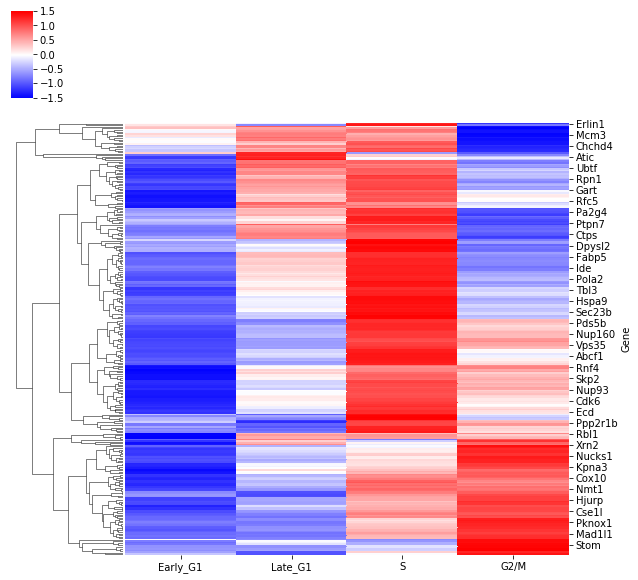

In [105]:
keep_col = ['Early_G1','Late_G1','S','G2/M']
temp_df = expression_df
temp_df = temp_df[temp_df['Oligos'] != '']
temp_df = temp_df[(temp_df['Oligos']>119)&
                  (temp_df['FPKM']>1)&
                  (temp_df['FPKM']<100)&
                  (np.abs(np.max(temp_df[keep_col],axis=1)>2))]
temp_df.index = temp_df['Gene']
sns.clustermap(temp_df[keep_col],center=0,cmap='bwr',col_cluster=False,z_score=0)

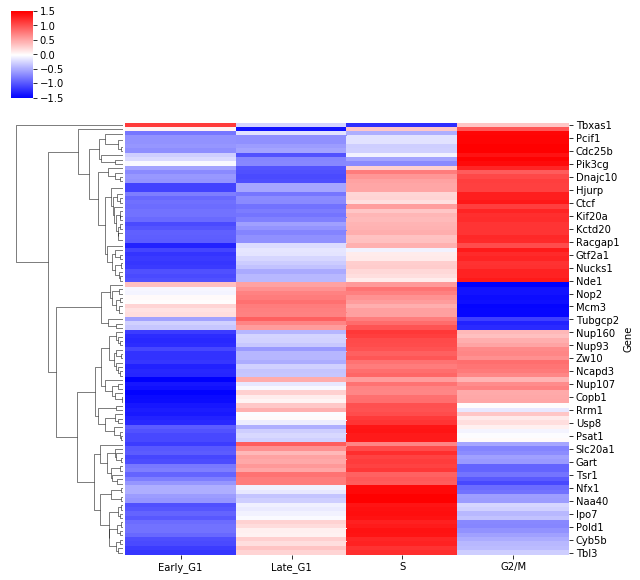

In [103]:
keep_col = ['Early_G1','Late_G1','S','G2/M']
temp_df = expression_df
temp_df = temp_df[temp_df['Oligos'] != '']
temp_df = temp_df[(temp_df['Oligos']>119)&
                  (temp_df['FPKM']>1)&
                  (temp_df['FPKM']<100)&
                  (np.std(temp_df[keep_col],axis=1)>0.75)]
temp_df.index = temp_df['Gene']
sns.clustermap(temp_df[keep_col],center=0,cmap='bwr',col_cluster=False,z_score=0)

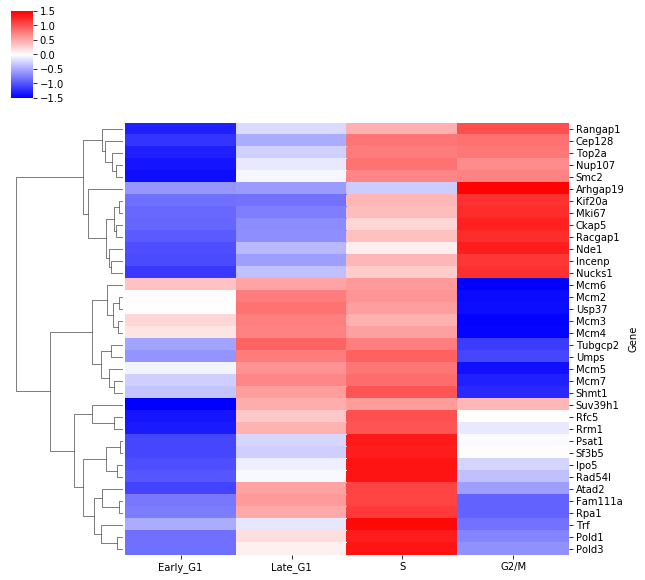

In [87]:
t = 80
EG1_Thresh = np.percentile(temp_df['Early_G1'],t)
LG1_Thresh = np.percentile(temp_df['Late_G1'],t)
S_Thresh = np.percentile(temp_df['S'],t)
G2_Thresh = np.percentile(temp_df['G2/M'],t)
top_df = temp_df[(temp_df['Early_G1']>EG1_Thresh) | 
                 (temp_df['Late_G1']>LG1_Thresh) | 
                 (temp_df['S']>S_Thresh) |
                 (temp_df['G2/M']>G2_Thresh)]
sns.clustermap(top_df[keep_col],center=0,cmap='bwr',col_cluster=False,z_score=0)

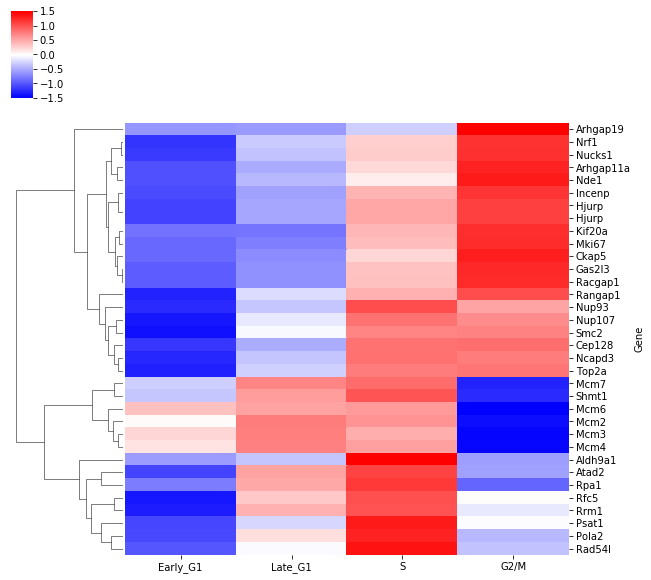

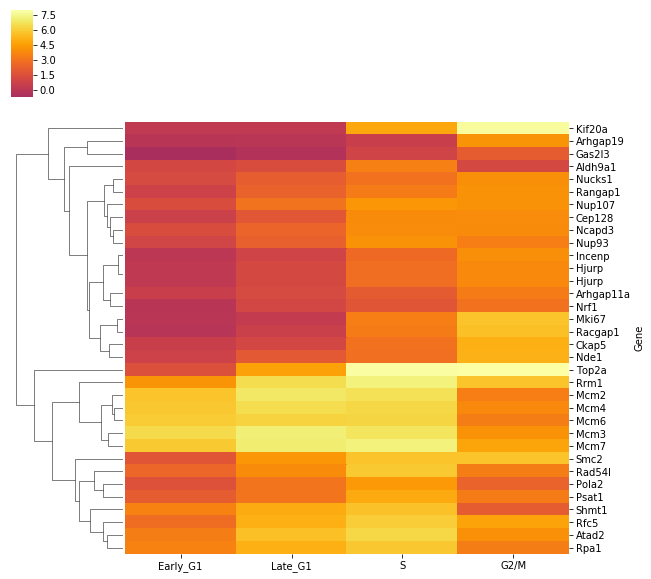

In [139]:
t = 80
EG1_Thresh = np.percentile(np.abs(expression_df['Z_Early_G1']),t)
LG1_Thresh = np.percentile(np.abs(expression_df['Z_Late_G1']),t)
S_Thresh = np.percentile(np.abs(expression_df['Z_S']),t)
G2_Thresh = np.percentile(np.abs(expression_df['Z_G2/M']),t)
temp_df = expression_df
temp_df = temp_df[temp_df['Oligos'] != '']
temp_df = temp_df[(temp_df['Oligos']==120)&
                  (temp_df['FPKM']>1)&
                  (temp_df['FPKM']<100)&
                  ((temp_df['FPKM']*np.max(temp_df[keep_col],axis=1))<100)&
                  (np.abs(np.max(temp_df[keep_col],axis=1))>2)&
                  (np.max(temp_df[keep_col],axis=1)<8)&
                  (np.std(temp_df[keep_col],axis=1)>1)&
                  ((np.abs(temp_df['Z_Early_G1'])>EG1_Thresh)|
                  (np.abs(temp_df['Z_Late_G1'])>LG1_Thresh)|
                  (np.abs(temp_df['Z_S'])>S_Thresh)|
                  (np.abs(temp_df['Z_G2/M'])>G2_Thresh))]
temp_df.index = temp_df['Gene']
sns.clustermap(temp_df[keep_col],center=0,cmap='bwr',col_cluster=False,z_score=0)
sns.clustermap(temp_df[keep_col],center=0,cmap='inferno',col_cluster=False)

In [141]:
len(temp_df)

34

In [140]:
temp_df

,Barcode,Description,Early_G1,FPKM,G2/M,Gene,Gene_ID,Late_G1,Length,Oligos,S,Transcript_ID,Z_Early_G1,Z_G2/M,Z_Late_G1,Z_S
Gene,,,,,,,,,,,,,,,,
Aldh9a1,1000110010000000,"aldehyde dehydrogenase 9, subfamily A1 [Source...",1.109,18.16,1.117,Aldh9a1,ENSMUSG00000026687,1.381,2835,120,3.532,ENSMUST00000028004,0.257,-0.391,0.013,1.044
Arhgap11a,1000110010000000,Rho GTPase activating protein 11A [Source:MGI ...,0.593,3.66,3.301,Arhgap11a,ENSMUSG00000041219,1.210,4958,120,2.058,ENSMUST00000102545,-0.314,1.260,-0.130,0.081
Arhgap19,1000110010000000,Rho GTPase activating protein 19 [Source:MGI S...,-0.052,14.47,4.187,Arhgap19,ENSMUSG00000025154,-0.001,5103,120,0.600,ENSMUST00000026150,-1.026,1.929,-1.133,-0.870
Atad2,1000110010000000,"ATPase family, AAA domain containing 2 [Source...",3.347,1.58,4.072,Atad2,ENSMUSG00000022360,5.587,5684,120,6.357,ENSMUST00000038194,2.731,1.843,3.500,2.889
Cep128,1000110010000000,centrosomal protein 128 [Source:MGI Symbol;Acc...,0.728,1.16,3.950,Cep128,ENSMUSG00000061533,1.836,4807,120,3.914,ENSMUST00000141429,-0.164,1.750,0.389,1.294
Ckap5,1000110010000000,cytoskeleton associated protein 5 [Source:MGI ...,0.587,3.19,5.136,Ckap5,ENSMUSG00000040549,1.033,6665,120,2.924,ENSMUST00000111338,-0.320,2.647,-0.276,0.647
Gas2l3,1000110010000000,growth arrest-specific 2 like 3 [Source:MGI Sy...,-0.715,3.79,2.093,Gas2l3,ENSMUSG00000074802,-0.337,6305,120,0.942,ENSMUST00000105298,-1.759,0.347,-1.412,-0.648
Hjurp,1000110010000000,Holliday junction recognition protein [Source:...,0.146,2.35,3.841,Hjurp,ENSMUSG00000044783,1.118,4878,120,2.850,ENSMUST00000054674,-0.807,1.668,-0.206,0.599
Hjurp,1000110010000000,Holliday junction recognition protein [Source:...,0.146,2.35,3.841,Hjurp,ENSMUSG00000044783,1.118,4878,120,2.850,ENSMUST00000054674,-0.807,1.668,-0.206,0.599


In [143]:
scope = ['https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive']
# Path to .json
path = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/ProbeDesign-92ebdb6a17a7.json'
creds = ServiceAccountCredentials.from_json_keyfile_name(path, scope)
client = gspread.authorize(creds)
# Start with a gene list 
expression_worksheet = client.open("Control_Module_Gene_List").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
expression_df

INFO:oauth2client.client:Refreshing access_token


,Barcode,Description,FPKM,Gene,Gene_ID,Isoform %,Length,Oligos,Transcript_ID
0,1000110010000000,"succinate dehydrogenase complex, subunit A, fl...",51.06210,Sdha,ENSMUSG00000021577,,2900,120,ENSMUST00000022062
1,1000110010000000,"glucuronidase, beta [Source:MGI Symbol;Acc:MGI...",104.04700,Gusb,ENSMUSG00000025534,,2687,120,ENSMUST00000026613
2,1000110010000000,tyrosine 3-monooxygenase/tryptophan 5-monooxyg...,25.49050,Ywhaz,ENSMUSG00000022285,,3288,95,ENSMUST00000022894
3,1000110010000000,"eukaryotic translation initiation factor 4, ga...",115.17200,Eif4g2,ENSMUSG00000005610,,3548,120,ENSMUST00000161051
4,1000110010000000,transferrin receptor [Source:MGI Symbol;Acc:MG...,95.44070,Tfrc,ENSMUSG00000022797,,4890,120,ENSMUST00000023486
5,1000110010000000,ER membrane protein complex subunit 7 [Source:...,11.48610,Emc7,ENSMUSG00000055943,,5826,120,ENSMUST00000069747
6,1000110010000000,receptor accessory protein 5 [Source:MGI Symbo...,48.50720,Reep5,ENSMUSG00000005873,,2894,120,ENSMUST00000006027
7,1000110010000000,small nuclear ribonucleoprotein D3 [Source:MGI...,3.05306,Snrpd3,ENSMUSG00000020180,,3036,120,ENSMUST00000020397
8,1000110010000000,store-operated calcium entry-associated regula...,67.38930,Saraf,ENSMUSG00000031532,,1860,84,ENSMUST00000033933
9,1000110010000000,hydroxymethylbilane synthase [Source:MGI Symbo...,7.50441,Hmbs,ENSMUSG00000032126,,1534,85,ENSMUST00000097558


In [157]:
gids = expression_worksheet.range('F2:F3000')
gids[11].value='Hello'
expression_worksheet.update_cells(gids)

{'spreadsheetId': '1PTkik2aQiNEDwHCKvOMJeHd140uG_TaL_vvS-OU9_Mc',
 'updatedRange': 'Sheet1!F2:F3000',
 'updatedRows': 2999,
 'updatedColumns': 1,
 'updatedCells': 2999}

In [156]:
gids

[<Cell R2C6 'ENSMUSG00000021577'>,
 <Cell R3C6 'ENSMUSG00000025534'>,
 <Cell R4C6 'ENSMUSG00000022285'>,
 <Cell R5C6 'ENSMUSG00000005610'>,
 <Cell R6C6 'ENSMUSG00000022797'>,
 <Cell R7C6 'ENSMUSG00000055943'>,
 <Cell R8C6 'ENSMUSG00000005873'>,
 <Cell R9C6 'ENSMUSG00000020180'>,
 <Cell R10C6 'ENSMUSG00000031532'>,
 <Cell R11C6 'ENSMUSG00000032126'>,
 <Cell R12C6 ''>,
 <Cell R13C6 ''>,
 <Cell R14C6 ''>,
 <Cell R15C6 ''>,
 <Cell R16C6 ''>,
 <Cell R17C6 ''>,
 <Cell R18C6 ''>,
 <Cell R19C6 ''>,
 <Cell R20C6 ''>,
 <Cell R21C6 ''>,
 <Cell R22C6 ''>,
 <Cell R23C6 ''>,
 <Cell R24C6 ''>,
 <Cell R25C6 ''>,
 <Cell R26C6 ''>,
 <Cell R27C6 ''>,
 <Cell R28C6 ''>,
 <Cell R29C6 ''>,
 <Cell R30C6 ''>,
 <Cell R31C6 ''>,
 <Cell R32C6 ''>,
 <Cell R33C6 ''>,
 <Cell R34C6 ''>,
 <Cell R35C6 ''>,
 <Cell R36C6 ''>,
 <Cell R37C6 ''>,
 <Cell R38C6 ''>,
 <Cell R39C6 ''>,
 <Cell R40C6 ''>,
 <Cell R41C6 ''>,
 <Cell R42C6 ''>,
 <Cell R43C6 ''>,
 <Cell R44C6 ''>,
 <Cell R45C6 ''>,
 <Cell R46C6 ''>,
 <Cell R47C6 ''>,


In [154]:
combined_df = pd.DataFrame(columns=combined_df.columns)
for column in temp_df.columns:
    if column in expression_df.columns:
        combined_df[column] = pd.concat((combined_df[column],expression_df[column]),axis=0,ignore_index=True)
        print(column)
combined_df

Barcode
Description
FPKM
Gene
Gene_ID
Length
Oligos
Transcript_ID


,Barcode,Description,Early_G1,FPKM,G2/M,Gene,Gene_ID,Late_G1,Length,Oligos,S,Transcript_ID,Z_Early_G1,Z_G2/M,Z_Late_G1,Z_S
0,1000110010000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000110010000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000110010000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000110010000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000110010000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1000110010000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1000110010000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1000110010000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000110010000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1000110010000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
temp_df.columns

Index(['Barcode', 'Description', 'Early_G1', 'FPKM', 'G2/M', 'Gene', 'Gene_ID',
       'Late_G1', 'Length', 'Oligos', 'S', 'Transcript_ID', 'Z_Early_G1',
       'Z_G2/M', 'Z_Late_G1', 'Z_S'],
      dtype='object')

In [164]:
biomart_download_fname = '/bigstore/binfo/mouse/mouse_ensemble.txt'
expression_path = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/MERFISH_analysis-master/mouse/Zach/Cornea/Expression/no_versions_isoforms_tracking.csv'
FPKM_df = pd.read_csv(open(expression_path, 'r'))
transcript_df = pd.read_csv(open(biomart_download_fname, 'r'))
gene_name = expression_worksheet.range('A2:A3000')
descript = expression_worksheet.range('B2:B3000')
fpkm = expression_worksheet.range('C2:C3000')
length = expression_worksheet.range('D2:D3000')
gids = expression_worksheet.range('F2:F3000')
tids = expression_worksheet.range('G2:G3000')
bc = expression_worksheet.range('H2:H3000')
EG1 = expression_worksheet.range('I2:I3000')
LG1 = expression_worksheet.range('J2:J3000')
S = expression_worksheet.range('K2:K3000')
G2 = expression_worksheet.range('L2:L3000')
ZEG1 = expression_worksheet.range('M2:M3000')
ZLG1 = expression_worksheet.range('N2:N3000')
ZS = expression_worksheet.range('O2:O3000')
ZG2 = expression_worksheet.range('P2:P3000')

genes = []
for i in temp_df['Gene'].values:
    if isinstance(i,str):
        i =i.strip()
        if len(i)>0:
            genes.append(i)
genes.sort()
for i,gene in enumerate(genes):
    idx = i+10
    gene = str(gene).strip()
    gene_df = temp_df[temp_df['Gene']==gene]
    gene_name[idx].value = gene_df['Gene'].iloc[0]
    descript[idx].value = gene_df['Description'].iloc[0]
    fpkm[idx].value = gene_df['FPKM'].iloc[0]
    length[idx].value = gene_df['Length'].iloc[0]
    gids[idx].value = gene_df['Gene_ID'].iloc[0]
    tids[idx].value = gene_df['Transcript_ID'].iloc[0]
    bc[idx].value = str(gene_df['Barcode'].iloc[0])
    EG1[idx].value = gene_df['Early_G1'].iloc[0]
    LG1[idx].value = gene_df['Late_G1'].iloc[0]
    S[idx].value = gene_df['S'].iloc[0]
    G2[idx].value = gene_df['G2/M'].iloc[0]
    ZEG1[idx].value = gene_df['Z_Early_G1'].iloc[0]
    ZLG1[idx].value = gene_df['Z_Late_G1'].iloc[0]
    ZS[idx].value = gene_df['Z_S'].iloc[0]
    ZG2[idx].value = gene_df['Z_G2/M'].iloc[0]

        

expression_worksheet.update_cells(gene_name)
expression_worksheet.update_cells(descript)
expression_worksheet.update_cells(fpkm)
expression_worksheet.update_cells(length)
expression_worksheet.update_cells(gids)
expression_worksheet.update_cells(tids)
expression_worksheet.update_cells(bc)
expression_worksheet.update_cells(EG1)
expression_worksheet.update_cells(LG1)
expression_worksheet.update_cells(S)
expression_worksheet.update_cells(G2)
expression_worksheet.update_cells(ZEG1)
expression_worksheet.update_cells(ZLG1)
expression_worksheet.update_cells(ZS)
expression_worksheet.update_cells(ZG2)

{'spreadsheetId': '1PTkik2aQiNEDwHCKvOMJeHd140uG_TaL_vvS-OU9_Mc',
 'updatedRange': 'Sheet1!P2:P3000',
 'updatedRows': 2999,
 'updatedColumns': 1,
 'updatedCells': 2999}

In [160]:
temp_df

,Barcode,Description,Early_G1,FPKM,G2/M,Gene,Gene_ID,Late_G1,Length,Oligos,S,Transcript_ID,Z_Early_G1,Z_G2/M,Z_Late_G1,Z_S
Gene,,,,,,,,,,,,,,,,
Aldh9a1,1000110010000000,"aldehyde dehydrogenase 9, subfamily A1 [Source...",1.109,18.16,1.117,Aldh9a1,ENSMUSG00000026687,1.381,2835,120,3.532,ENSMUST00000028004,0.257,-0.391,0.013,1.044
Arhgap11a,1000110010000000,Rho GTPase activating protein 11A [Source:MGI ...,0.593,3.66,3.301,Arhgap11a,ENSMUSG00000041219,1.210,4958,120,2.058,ENSMUST00000102545,-0.314,1.260,-0.130,0.081
Arhgap19,1000110010000000,Rho GTPase activating protein 19 [Source:MGI S...,-0.052,14.47,4.187,Arhgap19,ENSMUSG00000025154,-0.001,5103,120,0.600,ENSMUST00000026150,-1.026,1.929,-1.133,-0.870
Atad2,1000110010000000,"ATPase family, AAA domain containing 2 [Source...",3.347,1.58,4.072,Atad2,ENSMUSG00000022360,5.587,5684,120,6.357,ENSMUST00000038194,2.731,1.843,3.500,2.889
Cep128,1000110010000000,centrosomal protein 128 [Source:MGI Symbol;Acc...,0.728,1.16,3.950,Cep128,ENSMUSG00000061533,1.836,4807,120,3.914,ENSMUST00000141429,-0.164,1.750,0.389,1.294
Ckap5,1000110010000000,cytoskeleton associated protein 5 [Source:MGI ...,0.587,3.19,5.136,Ckap5,ENSMUSG00000040549,1.033,6665,120,2.924,ENSMUST00000111338,-0.320,2.647,-0.276,0.647
Gas2l3,1000110010000000,growth arrest-specific 2 like 3 [Source:MGI Sy...,-0.715,3.79,2.093,Gas2l3,ENSMUSG00000074802,-0.337,6305,120,0.942,ENSMUST00000105298,-1.759,0.347,-1.412,-0.648
Hjurp,1000110010000000,Holliday junction recognition protein [Source:...,0.146,2.35,3.841,Hjurp,ENSMUSG00000044783,1.118,4878,120,2.850,ENSMUST00000054674,-0.807,1.668,-0.206,0.599
Hjurp,1000110010000000,Holliday junction recognition protein [Source:...,0.146,2.35,3.841,Hjurp,ENSMUSG00000044783,1.118,4878,120,2.850,ENSMUST00000054674,-0.807,1.668,-0.206,0.599
